### Image segmentation using color space

**컬러 스페이스를 사용한 object detection**

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

skimage package reads the image as rgb but if opencv reads the image as bgr


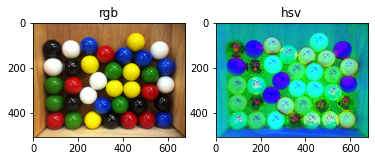

In [21]:
img = io.imread('img/marbles.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# draw images 
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('rgb')
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('hsv')
ax2.imshow(hsv)
plt.show()

**hsv color space map**

https://stackoverflow.com/questions/48528754/what-are-recommended-color-spaces-for-detecting-orange-color-in-open-cv

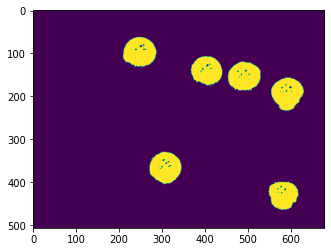

In [7]:
mask = cv2.inRange(hsv, (100, 90, 90), (120, 255, 255)) # Blue
plt.imshow(mask)

**Removal noise using closing operation**

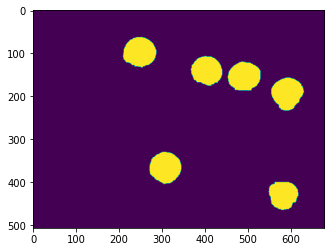

In [9]:
from scipy import ndimage as nd
colsed_mask = nd.binary_closing(mask, np.ones((7,7)))
plt.imshow(colsed_mask)

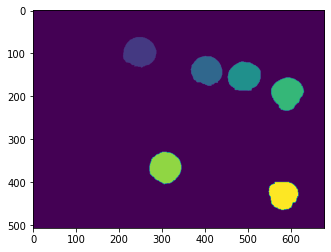

In [10]:
label_image = measure.label(colsed_mask)
plt.imshow(label_image)

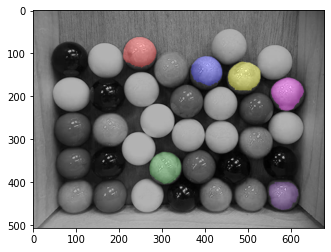

In [12]:
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [16]:
props = measure.regionprops_table(label_image, img,
                            properties=['Label',
                                        'area', 'equivalent_diameter',
                                        'mean_intensity', 'solidity'])

In [20]:
import pandas as pd
df = pd.DataFrame(props)
df.head(10)

,Label,area,equivalent_diameter,mean_intensity-0,mean_intensity-1,mean_intensity-2,solidity
0,1,4174,72.900630,28.364399,57.237422,166.677048,0.969120
1,2,3816,69.704247,16.807914,50.631551,165.330713,0.968774
2,3,4051,71.818475,16.462849,45.622809,156.433720,0.974735
3,4,4219,73.292548,21.007822,50.192226,153.982460,0.972792
4,5,4201,73.136033,20.598905,54.103547,172.134254,0.977431
5,6,3514,66.889190,17.941946,37.184405,142.080250,0.966181
